In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [2]:
train=pd.read_csv('Train_aBjfeNk.csv')
test=pd.read_csv('Test_LqhgPWU.csv')

In [3]:
df=pd.concat([train,test],axis=0,ignore_index=True)
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


# Data Reading and Eyeballing

In [4]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10695 entries, 0 to 10694
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10695 non-null  int64  
 1   Gender           10695 non-null  object 
 2   Ever_Married     10505 non-null  object 
 3   Age              10695 non-null  int64  
 4   Graduated        10593 non-null  object 
 5   Profession       10533 non-null  object 
 6   Work_Experience  9597 non-null   float64
 7   Spending_Score   10695 non-null  object 
 8   Family_Size      10247 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 919.2+ KB


In [5]:
# Checking for missing values
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
dtype: int64

In [6]:
# Shape of the data
df.shape

(10695, 11)

In [7]:
# Corelation matrix
df.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.009562,-0.029351,0.014095
Age,-0.009562,1.000000,-0.189653,-0.281725
Work_Experience,-0.029351,-0.189653,1.000000,-0.065163
Family_Size,0.014095,-0.281725,-0.065163,1.000000


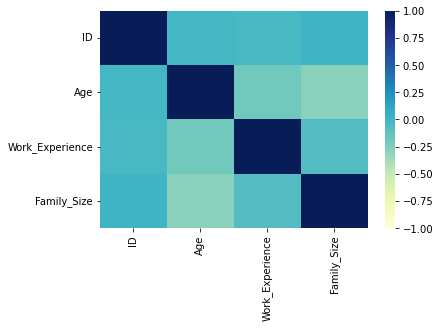

In [8]:
# Visualization of the corelation matrix
sns.heatmap(df.corr(),vmin=-1,vmax=1,cmap='YlGnBu')
plt.show()

In [9]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


In [10]:
pd.DataFrame(df.groupby('Segmentation')['Spending_Score'].value_counts())

Spending_Score
Segmentation Spending_Score                
A            Low                       1358
             Average                    343
             High                       271
B            Low                        884
             Average                    590
             High                       384
C            Average                    903
             Low                        662
             High                       405
D            Low                       1974
             High                       156
             Average                    138

* C has the highest number of high spending score
* D has the highest number of low spenders
* C has the maximum number of average spenders

Note: Cluster Count will be 4 because segmentation has been done in 4 segments

In [11]:
# Mapping the target segment
mapped={'D':0,'A':1,'B':2,'C':3}
df.Segmentation=df.Segmentation.map(mapped)

In [12]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,1.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,1.0
...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN
10692,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,NaN
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN


# Univariate and Bivariate analysis

In [13]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

In [14]:
cats=[ 'Gender', 'Ever_Married' ,'Graduated', 'Profession',
        'Spending_Score', 'Var_1',
       'Segmentation']

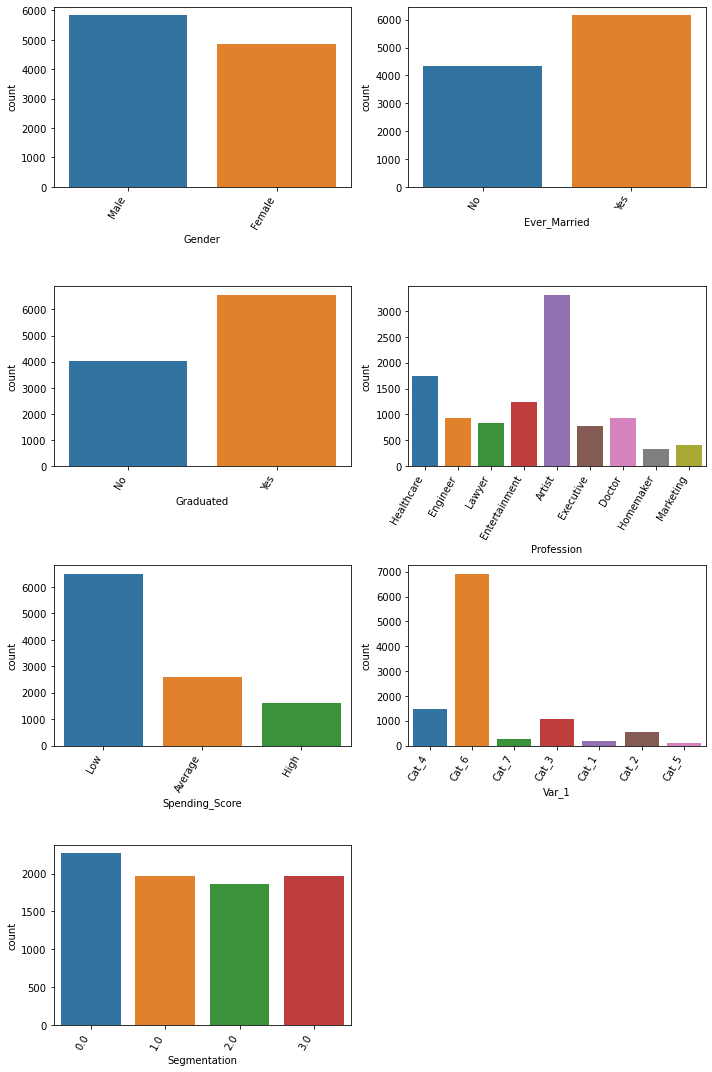

In [15]:
rows=4
cols=2
counter=1
plt.rcParams['figure.figsize']=[10,15]
for i in cats:
    plt.subplot(rows,cols,counter)
    sns.countplot(x=i,data=df)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

* More males than females followed by Graduation=Yes
* Most People are Married and most Artist followed by Healthcare
* Most of the people are low spenders
* Highest frequency of var_1 is category 6, followed category 4, category 3 and category 2

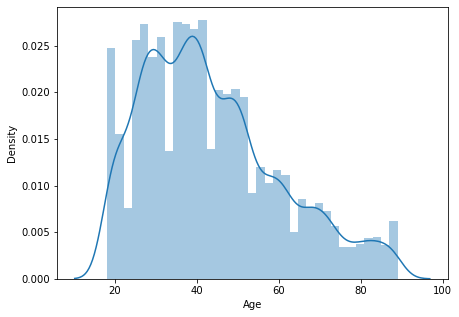

In [16]:
plt.rcParams['figure.figsize']=[7,5]
sns.distplot(df.Age)
plt.show()

In [17]:
df.Age.describe()

count    10695.000000
mean        43.511828
std         16.774158
min         18.000000
25%         30.000000
50%         41.000000
75%         53.000000
max         89.000000
Name: Age, dtype: float64

In [18]:
# Lets explore age basis spending score and segmentation
df.groupby(['Spending_Score','Segmentation'])['Age'].describe()

count       mean        std   min   25%   50%  \
Spending_Score Segmentation                                                   
Average        0.0            138.0  37.746377  11.353035  18.0  30.0  36.0   
               1.0            343.0  42.157434  11.885602  20.0  35.0  40.0   
               2.0            590.0  46.866102  10.451637  25.0  38.0  46.0   
               3.0            903.0  50.053156  10.195182  22.0  42.0  50.0   
High           0.0            156.0  48.192308  20.404653  18.0  30.0  42.0   
               1.0            271.0  58.494465  20.482490  18.0  39.5  59.0   
               2.0            384.0  58.643229  16.154292  18.0  45.0  58.0   
               3.0            405.0  60.167901  14.733489  19.0  49.0  60.0   
Low            0.0           1974.0  31.915907  14.833252  18.0  22.0  28.0   
               1.0           1358.0  42.916053  15.138088  18.0  32.0  40.0   
               2.0            884.0  44.554299  14.597057  18.0  33.0  42.0   
               3.0            662.0  41.160121  14.793844  18.0  30.0  38.0   

                               75%   max  
Spending_Score Segmentation               
Average        0.0           41.75  72.0  
               1.0           48.50  89.0  
               2.0           53.00  74.0  
               3.0           57.00  88.0  
High           0.0           68.00  89.0  
               1.0           77.00  89.0  
               2.0           72.00  89.0  
               3.0           71.00  89.0  
Low            0.0           35.00  89.0  
               1.0           50.00  89.0  
               2.0           53.00  89.0  
               3.0           50.00  88.0

* High Spenders have an average age in range of 48-60
* Low spenders have an average age in the range of 31-41

In [19]:
# Check Anova
# Ho: Age has no impact on target
# Ha: Age has an impact on the segmentation

# This means we have to explore and specify the age brackets
# for effecting targetting...
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [20]:
model=ols('Age~Segmentation',data=df).fit()
anova_lm(model)
# Age is significant for the target

,df,sum_sq,mean_sq,F,PR(>F)
Segmentation,1.0,2.789096e+05,278909.579952,1139.62984,8.446113e-234
Residual,8066.0,1.974049e+06,244.736993,NaN,NaN


In [21]:
# Age Bins:- 18-25,25-30,30-40,40-50,>50

In [22]:
def bin_age(x):
    if x<=25:
        return 1
    elif x<=30:
        return 2
    elif x<=40:
        return 3
    elif x<=50:
        return 4
    else:
        return 5

In [23]:
df['Age_cat']=df.Age.apply(bin_age)

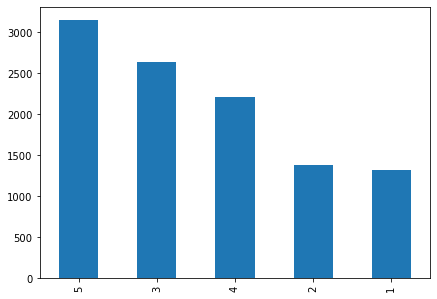

In [24]:
df.Age_cat.value_counts().plot.bar()
plt.show()

# Handling missing values

In [25]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [26]:
df.loc[df.Ever_Married=='No','Spending_Score'].value_counts()

Low    4342
Name: Spending_Score, dtype: int64

In [27]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [28]:
df.Ever_Married.fillna('unk',inplace=True)

In [29]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [30]:
df.Graduated.fillna('unk',inplace=True)

In [31]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [32]:
df.Profession.fillna('unk',inplace=True)

In [33]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [34]:
df.Work_Experience.fillna(-1,inplace=True)

In [35]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation       2627
Age_cat               0
dtype: int64

In [36]:
df.Family_Size.fillna(-1,inplace=True)

In [37]:
df.Var_1.fillna('unk',inplace=True)

In [38]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [39]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,0.0,1
1,462643,Female,Yes,38,Yes,Engineer,-1.0,Average,3.0,Cat_4,1.0,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,2.0,5
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,2.0,5
4,462669,Female,Yes,40,Yes,Entertainment,-1.0,High,6.0,Cat_6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,NaN,2
10691,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,NaN,3
10692,467960,Female,No,53,Yes,Entertainment,-1.0,Low,2.0,Cat_6,NaN,5
10693,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,NaN,4


# Mapping the variables

In [40]:
df.Gender=df.Gender.map({'Male':1,'Female':2})
df.Ever_Married=df.Ever_Married.map({'No':1,'Yes':2,'unk':3})
df.Graduated=df.Graduated.map({'No':1,'Yes':2,'unk':3})
df.Spending_Score=df.Spending_Score.map({'Low':1,'Average':2,'High':3})

In [41]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [42]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,1,1,22,1,Healthcare,1.0,1,4.0,Cat_4,0.0,1
1,462643,2,2,38,2,Engineer,-1.0,2,3.0,Cat_4,1.0,3
2,466315,2,2,67,2,Engineer,1.0,1,1.0,Cat_6,2.0,5
3,461735,1,2,67,2,Lawyer,0.0,3,2.0,Cat_6,2.0,5
4,462669,2,2,40,2,Entertainment,-1.0,3,6.0,Cat_6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,Healthcare,9.0,1,4.0,Cat_6,NaN,2
10691,467958,2,1,35,2,Doctor,1.0,1,1.0,Cat_6,NaN,3
10692,467960,2,1,53,2,Entertainment,-1.0,1,2.0,Cat_6,NaN,5
10693,467961,1,2,47,2,Executive,1.0,3,5.0,Cat_4,NaN,4


In [43]:
df.Var_1=df.Var_1.map({'Cat_1':1,'Cat_2':2,'Cat_3':3,'Cat_4':4,'Cat_5':5,'Cat_6':6,'Cat_7':7,'unk':8})

In [44]:
df.Var_1.value_counts()

6    6910
4    1475
3    1089
2     563
7     269
1     167
5     114
8     108
Name: Var_1, dtype: int64

In [45]:
df.isnull().sum()

ID                    0
Gender                0
Ever_Married          0
Age                   0
Graduated             0
Profession            0
Work_Experience       0
Spending_Score        0
Family_Size           0
Var_1                 0
Segmentation       2627
Age_cat               0
dtype: int64

In [46]:
df.Profession.value_counts().index

Index(['Artist', 'Healthcare', 'Entertainment', 'Engineer', 'Doctor', 'Lawyer',
       'Executive', 'Marketing', 'Homemaker', 'unk'],
      dtype='object')

In [47]:
df.Profession=df.Profession.map({'Artist':1, 'Healthcare':2, 'Entertainment':3, 'Engineer':4, 'Doctor':5, 'Lawyer':6,
       'Executive':7, 'Marketing':8, 'Homemaker':9, 'unk':10})

In [48]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4


In [49]:
def family_bin(x):
    if x<2:
        return 1
    elif x<=5:
        return 2
    else:
        return 3

In [50]:
df['family_cat']=df.Family_Size.apply(family_bin)

In [51]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1,2
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3,2
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5,1
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2,2
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3,1
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5,2
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4,2


In [52]:
df.Work_Experience.describe()

count    10695.000000
mean         2.248153
std          3.394726
min         -1.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         14.000000
Name: Work_Experience, dtype: float64

In [53]:
df.loc[(df.Age>60) & (df.Work_Experience==0)]
# There are people with High age and 0 work experience

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2
8,465015,2,2,61,2,4,0.0,1,3.0,7,0.0,5,2
19,464291,2,2,79,2,1,0.0,3,1.0,6,3.0,5,1
62,464091,1,2,74,2,6,0.0,3,3.0,6,0.0,5,2
97,461334,1,2,63,2,1,0.0,3,2.0,6,3.0,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10600,467659,1,2,65,2,3,0.0,2,2.0,6,NaN,5,2
10621,467726,1,2,82,2,6,0.0,3,2.0,6,NaN,5,2
10635,467768,1,2,62,2,5,0.0,2,2.0,6,NaN,5,2
10647,467815,2,2,73,2,1,0.0,1,2.0,6,NaN,5,2


In [54]:
def work_bin(x):
    if x<=0:
        return 0
    elif x==1:
        return 1
    elif (x<=5):
        return 2
    elif x<=10:
        return 3
    else:
        return 4

In [55]:
df['Work_cat']=df.Work_Experience.apply(work_bin)

In [56]:
df.Work_cat.value_counts()

0    4185
1    3127
3    1810
2    1326
4     247
Name: Work_cat, dtype: int64

# Feature Engineering

In [57]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation', 'Age_cat', 'family_cat', 'Work_cat'],
      dtype='object')

In [58]:
temp=df.groupby('Age').agg({'Spending_Score':['count','min','mean','max'],
                           'Family_Size':['count','min','max'],
                           'Work_Experience':['count','min','mean','max'],
                           'Profession':['count','min','max'],
                           'Var_1':['count','min','max']})

In [59]:
temp.columns=['_'.join(x) for x in temp.columns]

In [60]:
new=pd.merge(left=df,right=temp,on='Age',how='left')

In [61]:
new.shape

(10695, 31)

In [62]:
new

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Age_cat,family_cat,Work_cat,Spending_Score_count,Spending_Score_min,Spending_Score_mean,Spending_Score_max,Family_Size_count,Family_Size_min,Family_Size_max,Work_Experience_count,Work_Experience_min,Work_Experience_mean,Work_Experience_max,Profession_count,Profession_min,Profession_max,Var_1_count,Var_1_min,Var_1_max
0,462809,1,1,22,1,2,1.0,1,4.0,4,0.0,1,2,1,184,1,1.092391,3,184,-1.0,9.0,184,-1.0,1.820652,11.0,184,1,10,184,1,8
1,462643,2,2,38,2,4,-1.0,2,3.0,4,1.0,3,2,0,288,1,1.482639,3,288,-1.0,8.0,288,-1.0,3.100694,14.0,288,1,10,288,1,8
2,466315,2,2,67,2,4,1.0,1,1.0,6,2.0,5,1,1,78,1,2.012821,3,78,-1.0,9.0,78,-1.0,0.717949,10.0,78,1,10,78,1,7
3,461735,1,2,67,2,6,0.0,3,2.0,6,2.0,5,2,0,78,1,2.012821,3,78,-1.0,9.0,78,-1.0,0.717949,10.0,78,1,10,78,1,7
4,462669,2,2,40,2,3,-1.0,3,6.0,6,1.0,3,3,0,300,1,1.466667,3,300,-1.0,9.0,300,-1.0,3.220000,14.0,300,1,10,300,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10690,467954,1,1,29,1,2,9.0,1,4.0,6,NaN,2,2,3,244,1,1.217213,3,244,-1.0,9.0,244,-1.0,2.799180,14.0,244,1,9,244,1,8
10691,467958,2,1,35,2,5,1.0,1,1.0,6,NaN,3,1,1,321,1,1.514019,3,321,-1.0,7.0,321,-1.0,3.233645,14.0,321,1,10,321,1,8
10692,467960,2,1,53,2,3,-1.0,1,2.0,6,NaN,5,2,0,199,1,1.788945,3,199,-1.0,7.0,199,-1.0,2.140704,14.0,199,1,9,199,1,8
10693,467961,1,2,47,2,7,1.0,3,5.0,4,NaN,4,2,1,217,1,1.737327,3,217,-1.0,7.0,217,-1.0,1.649770,13.0,217,1,10,217,1,8


# Split the data in train and test

In [63]:
train.shape,test.shape

((8068, 11), (2627, 10))

In [64]:
newtrain=new.iloc[:train.shape[0],:]
newtest=new.iloc[train.shape[0]:,:]

In [65]:
newtrain.shape,newtest.shape

((8068, 31), (2627, 31))

In [66]:
newtest.drop(columns=['ID','Segmentation'],inplace=True)

In [67]:
newtrain.drop(columns=['ID'],inplace=True)

In [68]:
X=newtrain.drop(columns='Segmentation')
y=newtrain.Segmentation

In [69]:
X.shape,newtest.shape

((8068, 29), (2627, 29))

In [70]:
del temp,df

In [71]:
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=4,random_state=420)

X['Clusters']=kmeans.fit_predict(X)

In [72]:
kmeans=KMeans(n_clusters=4,random_state=420)
newtest['Clusters']=kmeans.fit_predict(newtest)

In [73]:
X.shape,newtest.shape

((8068, 30), (2627, 30))

# Model Bulding

In [74]:
## We will build all the models by splitting the train data as website has some issues

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.20,random_state=420,stratify=X['Clusters'])

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [78]:
lg=LogisticRegression(random_state=140)
rf=RandomForestClassifier(random_state=598,criterion='entropy')
gbm=GradientBoostingClassifier(random_state=150)
xgb=XGBClassifier(random_state=138)
lgbm=LGBMClassifier(random_state=438)
cboost=CatBoostClassifier(random_state=660)

In [79]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(xtrain,ytrain)
    print(name,'model generates accuracy score of',accuracy_score(ytest,model.predict(xtest)))

lg model generates accuracy score of 0.44671623296158613
rf model generates accuracy score of 0.4739776951672863
gbm model generates accuracy score of 0.5291201982651796
xgb model generates accuracy score of 0.5142503097893433
lgbm model generates accuracy score of 0.5278810408921933
Learning rate set to 0.087021
0:	learn: 1.3387664	total: 168ms	remaining: 2m 47s
1:	learn: 1.3024426	total: 179ms	remaining: 1m 29s
2:	learn: 1.2719394	total: 198ms	remaining: 1m 5s
3:	learn: 1.2448538	total: 209ms	remaining: 52.1s
4:	learn: 1.2224130	total: 225ms	remaining: 44.7s
5:	learn: 1.2040438	total: 242ms	remaining: 40.1s
6:	learn: 1.1878111	total: 257ms	remaining: 36.5s
7:	learn: 1.1726086	total: 275ms	remaining: 34.1s
8:	learn: 1.1604927	total: 291ms	remaining: 32s
9:	learn: 1.1481868	total: 307ms	remaining: 30.4s
10:	learn: 1.1390179	total: 323ms	remaining: 29s
11:	learn: 1.1294690	total: 339ms	remaining: 27.9s
12:	learn: 1.1213725	total: 354ms	remaining: 26.8s
13:	learn: 1.1134191	total: 371ms	

In [80]:
from imblearn.over_sampling import SMOTE

In [81]:
smote=SMOTE()

In [82]:
smote_xsamp,smote_y=smote.fit_resample(X,y)

In [83]:
sxtrain,sxtest,sytrain,sytest=train_test_split(smote_xsamp,smote_y,test_size=0.20,random_state=420,stratify=smote_xsamp['Clusters'])

In [84]:
from sklearn.metrics import accuracy_score
for model,name in zip([lg,rf,gbm,xgb,lgbm,cboost],['lg','rf','gbm','xgb','lgbm','cboost']):
    model.fit(sxtrain,sytrain)
    print(name,'model generates accuracy score of',accuracy_score(ytest,model.predict(xtest)))

lg model generates accuracy score of 0.4560099132589839
rf model generates accuracy score of 0.7273853779429987
gbm model generates accuracy score of 0.557001239157373
xgb model generates accuracy score of 0.6697645600991325
lgbm model generates accuracy score of 0.6301115241635687
Learning rate set to 0.087543
0:	learn: 1.3401511	total: 18.6ms	remaining: 18.6s
1:	learn: 1.3046067	total: 31ms	remaining: 15.5s
2:	learn: 1.2802603	total: 43.4ms	remaining: 14.4s
3:	learn: 1.2535920	total: 56.2ms	remaining: 14s
4:	learn: 1.2337663	total: 67.9ms	remaining: 13.5s
5:	learn: 1.2157013	total: 80.2ms	remaining: 13.3s
6:	learn: 1.1996487	total: 92.1ms	remaining: 13.1s
7:	learn: 1.1838711	total: 103ms	remaining: 12.8s
8:	learn: 1.1726858	total: 115ms	remaining: 12.7s
9:	learn: 1.1626851	total: 127ms	remaining: 12.6s
10:	learn: 1.1517907	total: 139ms	remaining: 12.5s
11:	learn: 1.1443697	total: 157ms	remaining: 12.9s
12:	learn: 1.1351684	total: 176ms	remaining: 13.3s
13:	learn: 1.1268887	total: 193

In [85]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import StackingClassifier
kfold = StratifiedKFold(n_splits = 5,shuffle = True)

level0=[('xgb',xgb),('gbm',gbm),('cboost',cboost)]
level1=rf

stack=StackingClassifier(estimators=level0,final_estimator=level1,cv=5)

gbm=GradientBoostingClassifier()

pred_model = pd.DataFrame()

n =10
for i in range(n):
    folds = next(kfold.split(smote_xsamp,smote_y))
    sxtrain = smote_xsamp.iloc[folds[0]]
    sytrain = smote_y.iloc[folds[0]]
    pred_model[i] = gbm.fit(sxtrain, sytrain).predict(xtest)
    
    
vals = pred_model.mode(axis=1)

In [86]:
vals

,0,1
0,2.0,NaN
1,3.0,NaN
2,0.0,NaN
3,2.0,NaN
4,0.0,NaN
...,...,...
1609,0.0,NaN
1610,1.0,NaN
1611,0.0,NaN
1612,0.0,NaN


In [87]:
accuracy_score(ytest,vals[0])

0.5774473358116481